In [2]:
from mpi4py import MPI
import numpy as np
import h5py
import dxchange
import torch as tc
import os
import torch as tc
import torch.nn.functional as F
from tqdm import tqdm
import csv

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib 
matplotlib.rcParams['pdf.fonttype'] = 'truetype'
fontProperties = {'family': 'sans-serif', 'sans-serif': ['Helvetica'], 'weight': 'normal', 'size': 12}
plt.rc('font', **fontProperties)

from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick

In [11]:
def rotate(arr, theta, dev):
 
    m0 = tc.tensor([tc.cos(theta), -tc.sin(theta), 0.0], device=dev)
    m1 = tc.tensor([tc.sin(theta), tc.cos(theta), 0.0], device=dev)
    m = tc.stack([m0, m1]).view(1, 2, 3)
    m = m.repeat([arr.shape[0], 1, 1])
    
    g = F.affine_grid(m, arr.shape)
    q = F.grid_sample(arr, g, padding_mode='border')
    
    return q


In [8]:
## For a 64 x 64 x 64 sample_8_size_64_test  ##
######################################################################
dev = 'cpu'
# experiemtal parameters #
# theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1)[:-1].to(dev)
sample_size_n = tc.tensor(64).to(dev)
sample_height_n = tc.tensor(64).to(dev)
sample_size_cm = tc.tensor(0.01).to(dev)
this_aN_dic = {"Ca": 20, "Sc": 21}
probe_energy = np.array([20.0])
det_size_cm = 0.9
det_from_sample_cm = 1.6
det_ds_spacing_cm = 0.4

# path of true grid concentration of the sample #
grid_path = './data/sample8_size_64_pad/nElements_2'
f_grid = 'grid_concentration.npy'

# XRF and XRT data path #


# path of storing the intersecting information and the reconstructing results #
recon_path = './data/sample_8_size_64_test_recon_woSelfAb'
f_recon_parameters = 'recon_parameters.txt'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
######################################################################

In [5]:
## For a 44 x 44 x 20 sample: Xtal1, downsampling x4  ##
######################################################################
dev = 'cpu'
# experiemtal parameters #
# theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1)[:-1].to(dev)
sample_size_n = tc.tensor(44).to(dev)
sample_height_n = tc.tensor(20).to(dev)
sample_size_cm = tc.tensor(0.007).to(dev)
this_aN_dic = {"Al": 13, "Si": 14, "Cr": 24, "Cu": 29}, 
probe_energy = np.array([10.0])
det_size_cm = 2.4
det_from_sample_cm = 3.0
det_ds_spacing_cm = 2.4/2

# path of true grid concentration of the sample #


# XRF and XRT data path #


# path of storing the intersecting information and the reconstructing results #
recon_path = './data/Xtal1_align1_adjusted1_ds4_recon/Ab_F_nEl_4_nDpts_5_b_1E-4_lr_1E-3'
# recon_path = './data/Xtal1_align1_adjusted1_ds4_recon/b_1E-4'
f_recon_parameters = 'recon_parameters.txt'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
######################################################################

In [300]:
print(np.mean(recon))

0.1239934


## Plot the reconstructed result - layer sectioning

[30 35 40]


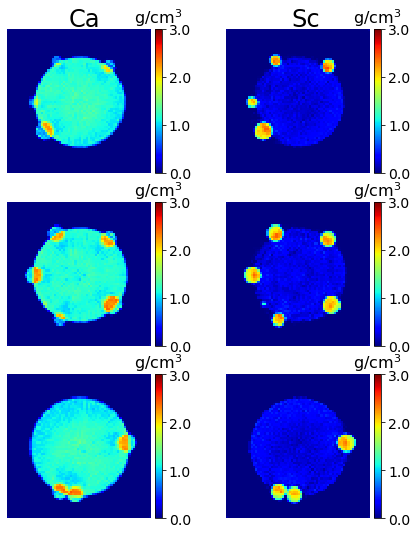

In [9]:
# layer_idx_ls = np.arange(0, 20, 2)
layer_idx_ls = np.array([30, 35, 40])
print(layer_idx_ls)
recon = np.load(os.path.join(recon_path, f_recon_grid + '.npy'))

image_size = recon.shape[-1]
fig6 = plt.figure(figsize=(4 * recon.shape[0] * 0.9 , 3 * len(layer_idx_ls)))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = recon.shape[0], width_ratios=[1] * recon.shape[0])

# fig6.text(0.160+0.035, 0.882, 'Al', color='black', fontsize=24)
# fig6.text(0.36+0.035, 0.882, 'Si', color='black', fontsize=24)
# fig6.text(0.56+0.035, 0.882, 'Fe', color='black', fontsize=24)
# fig6.text(0.76+0.035, 0.882, 'Cu', color='black', fontsize=24)

# vmax_element_ls = [1,1,5,5]
fig6.text(0.27, 0.885, 'Ca', color='black', fontsize=24)
fig6.text(0.70, 0.885, 'Sc', color='black', fontsize=24)

for element_idx in range(recon.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
#         pos = fig6_ax1.imshow(recon[element_idx,layer_idx], cmap='jet', vmin=0, vmax=vmax_element_ls[element_idx], extent=[0., image_size, image_size, 0.], origin='upper')
#         pos = fig6_ax1.imshow(recon[element_idx,layer_idx], cmap='jet', vmin=0, vmax=np.ceil(np.max(recon[element_idx])), extent=[0., image_size, image_size, 0.], origin='upper')
        pos = fig6_ax1.imshow(recon[element_idx,layer_idx], cmap='jet', vmin=0, vmax=3, extent=[0., image_size, image_size, 0.], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05) 
        ticks = np.arange(0, np.ceil(np.max(recon[element_idx]))+1, 1)
        cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar.ax.set_yticklabels(["{:.1f}".format(i) for i in ticks])
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('g/'+r'$\rm{cm}^{3}$', size='16')
        
plt.savefig(os.path.join(recon_path, 'recon_layer_section.pdf'))

## Plot the reconstructed result - projection view

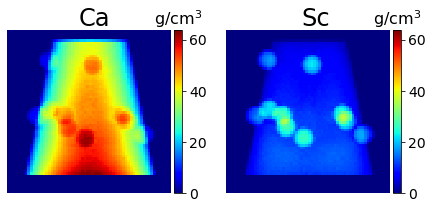

In [13]:
fraction_of_pi = 0.
projection_angle = fraction_of_pi*tc.tensor(np.pi)


recon = np.load(os.path.join(recon_path, f_recon_grid + '.npy'))
recon = rotate(tc.from_numpy(recon), projection_angle, "cpu")
recon = recon.numpy()

smaple_height = recon.shape[1]
image_size = recon.shape[-1]

recon_proj = np.sum(recon, axis=2)
fig6 = plt.figure(figsize=(4 * recon.shape[0] * 0.9 , 3))
gs6 = gridspec.GridSpec(nrows= 1, ncols = recon.shape[0], width_ratios=[1] * recon.shape[0])

# fig6.text(0.160+0.035, 0.7, 'Al', color='black', fontsize=24)
# fig6.text(0.360+0.035, 0.7, 'Si', color='black', fontsize=24)
# fig6.text(0.560+0.035, 0.7, 'Fe', color='black', fontsize=24)
# fig6.text(0.760+0.035, 0.7, 'Cu', color='black', fontsize=24)

fig6.text(0.27, 0.9, 'Ca', color='black', fontsize=24)
fig6.text(0.70, 0.9, 'Sc', color='black', fontsize=24)

for element_idx in range(recon.shape[0]):
    fig6_ax1 = fig6.add_subplot(gs6[0, element_idx])
    fig6_ax1.set_xticks(np.arange(0, image_size, 1))
    fig6_ax1.set_yticks(np.arange(0, image_size, 1))
    # fig6_ax1.grid(color='w', linewidth=2)
    fig6_ax1.axis('off')
    pos = fig6_ax1.imshow(recon_proj[element_idx], cmap='jet', vmin=0, vmax=np.max(recon_proj), extent=[0, image_size, smaple_height, 0], origin='upper')
    divider = make_axes_locatable(fig6_ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
#         ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
#         cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
    cbar = fig6.colorbar(pos, cax=cax)
    cbar.ax.tick_params(labelsize=14) 
    cbar.ax.set_title('g/'+r'$\rm{cm}^{3}$', size='16')

plt.savefig(os.path.join(recon_path, f'recon_projection_{fraction_of_pi}.pdf'))

# Plot the sinogram from the raw data

In [51]:
## For a 64 x 64 x 64 sample: sample8 ##
######################################################################
# XRF and XRT data path #
data_path = './data/Xtal1_align1_adjusted1_ds2'
f_XRF_data = 'xtal1_xrf-roi-plus'
f_XRT_data = 'xtal1_scalers'

y1_true_handle = h5py.File(os.path.join(data_path, f_XRF_data), 'r')
y2_true_handle = h5py.File(os.path.join(data_path, f_XRT_data), 'r') 

element_lines_roi_idx = np.array([0, 1, 11, 14])
photon_counts_ds_ic_dataset_idx = 2
# path of storing the intersecting information and the reconstructing results #
recon_path_selfAb = 'data/Xtal1_align1_adjusted1_ds2_recon/roi_plus'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
dev = 'cpu'
# experiemtal parameters #
theta_ls = tc.from_numpy(y1_true_handle['exchange/theta'][...] * np.pi / 180).float().to(dev)
n_theta = len(theta_ls)
sample_size_n = 88
sample_height_n = 40
sample_size_cm = 0.007
this_aN_dic = {"Al": 13, "Si": 14, "Fe": 26, "Cu": 29}
n_elements = 4
probe_energy = np.array([10.0])
det_size_cm = 2.4
det_from_sample_cm = 3.0
det_ds_spacing_cm = 2.4/2
######################################################################


XRF_data = np.reshape(y1_true_handle['exchange/data'][element_lines_roi_idx], (len(element_lines_roi_idx), n_theta, sample_height_n * sample_size_n))
XRT_data = np.reshape(y2_true_handle['exchange/data'][photon_counts_ds_ic_dataset_idx], (n_theta, sample_height_n * sample_size_n))

y1_true_handle.close()
y2_true_handle.close()

(4, 110, 3520)


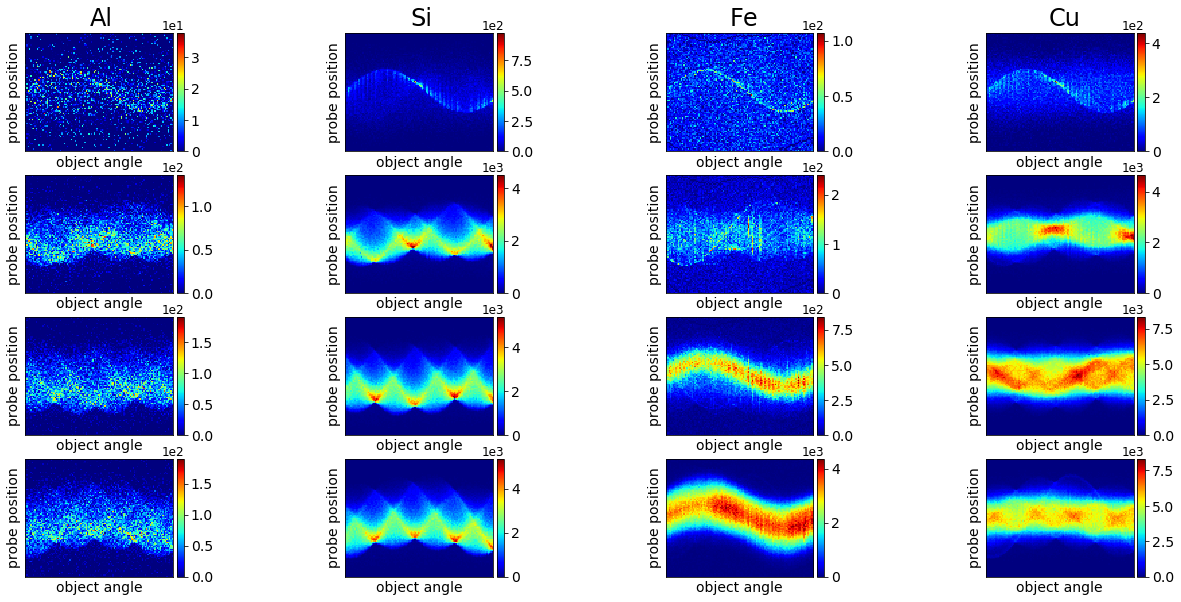

In [61]:
layer_idx_ls = np.arange(0, 40, 10)
n_elements = len(this_aN_dic)
line_idx_all_elements_ls = [[0], [1], [2], [3]]
n_theta =  110
n_theta_ds_factor = 1

print(XRF_data.shape) # (n_theta, n_lines, n_probe_pos)

fig6 = plt.figure(figsize=(22, 10))
gs6 = gridspec.GridSpec(nrows=len(layer_idx_ls), ncols=n_elements)
# fig6.text(0.270, 0.89, 'Ca', color='black', fontsize=24)
# fig6.text(0.700, 0.89, 'Sc', color='black', fontsize=24)

fig6.text(0.165+0.035, 0.89, 'Al', color='black', fontsize=24)
fig6.text(0.367+0.035, 0.89, 'Si', color='black', fontsize=24)
fig6.text(0.569+0.035, 0.89, 'Fe', color='black', fontsize=24)
fig6.text(0.770+0.035, 0.89, 'Cu', color='black', fontsize=24)

for i_element in range(n_elements):
    max_XRF_data_this_line = 0.
    for idx, layer_idx in enumerate(layer_idx_ls):
        probe_pos_st = sample_size_n * layer_idx
        probe_pos_end = sample_size_n * (layer_idx + 1)
        XRF_data_ds = np.zeros(XRF_data[0, ::n_theta_ds_factor, probe_pos_st:probe_pos_end].shape)
        line_idx_ls = line_idx_all_elements_ls[i_element]
        for line_idx in line_idx_ls:
            XRF_data_ds += XRF_data[line_idx, ::n_theta_ds_factor, probe_pos_st:probe_pos_end]
        XRF_data_ds = np.transpose(XRF_data_ds, (1,0))
        max_XRF_data_this_line = np.max(np.array([max_XRF_data_this_line, np.max(XRF_data_ds)]))
        fig6_ax1 = fig6.add_subplot(gs6[idx, i_element])
        pos = fig6_ax1.imshow(XRF_data_ds, cmap='jet', vmin=0, vmax=max_XRF_data_this_line, extent=[0, XRF_data_ds.shape[1], probe_pos_end-probe_pos_st, 0], origin='lower')
#         pos = fig6_ax1.imshow(XRF_data_ds, cmap='jet', vmin=0, vmax=10000, extent=[0, XRF_data_ds.shape[1], probe_pos_end-probe_pos_st, 0], origin='lower')
        plt.setp(fig6_ax1.get_xticklabels(), visible=False)
        plt.setp(fig6_ax1.get_yticklabels(), visible=False)
        fig6_ax1.tick_params(axis='both', which='both', length=0)
#         fig6_ax1.axis('off')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
#         ticks = np.arange(0, 12000, 2000)
#         cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar = fig6.colorbar(pos, cax=cax) 
        cbar.ax.tick_params(labelsize=14) 
        cbar.formatter.set_powerlimits((0, 0))
        fig6_ax1.set_ylabel("probe position", fontsize=14)
        fig6_ax1.set_xlabel("object angle", fontsize=14)
    # cbar.ax.set_title('XRF signal', size='14')
plt.savefig('XRF_sinogram.pdf', format='pdf', dpi=600)

## Plot the initial guess

./data/sample_8_size_64_test_recon/initialized_grid_concentration.npy


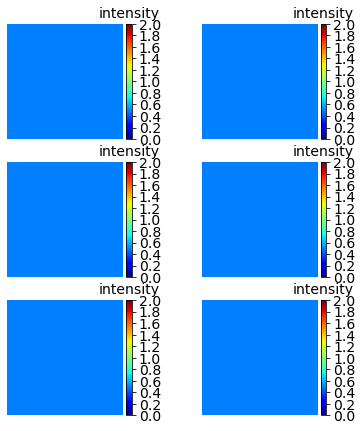

In [19]:
recon_ini = np.load(os.path.join(recon_path, f_initial_guess)+'.npy')
print(os.path.join(recon_path, f_initial_guess)+'.npy')
image_size = recon_ini.shape[-1]
fig6 = plt.figure(figsize=(4 * recon_ini.shape[0] * 0.8 , 3 * len(layer_idx_ls) * 0.8))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = recon_ini.shape[0], width_ratios=[1] * recon_ini.shape[0])


for element_idx in range(recon_ini.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
        pos = fig6_ax1.imshow(recon_ini[element_idx,layer_idx], cmap='jet', vmin=0, vmax=2.0, extent=[0, 5, 5, 0], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
        cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('intensity', size='14')

# Plot the ground truth if using a simulated dataset

## plot the ground truth - layer sectioning

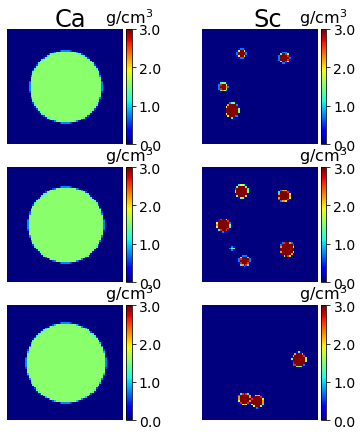

In [30]:
gt = np.load(os.path.join(grid_path, f_grid))

image_size = gt.shape[-1]
fig6 = plt.figure(figsize=(4 * gt.shape[0] * 0.8 , 3 * len(layer_idx_ls) * 0.8))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = gt.shape[0], width_ratios=[1] * gt.shape[0])

fig6.text(0.27, 0.885, 'Ca', color='black', fontsize=24)
fig6.text(0.70, 0.885, 'Sc', color='black', fontsize=24)

for element_idx in range(gt.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
        pos = fig6_ax1.imshow(gt[element_idx,layer_idx], cmap='jet', vmin=0, vmax=3, extent=[0, image_size, image_size, 0], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        ticks = np.arange(0, 4, 1)
        cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar.ax.set_yticklabels(["{:.1f}".format(i) for i in ticks])
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('g/'+r'$\rm{cm}^{3}$', size='16')

## plot the ground truth - projection view

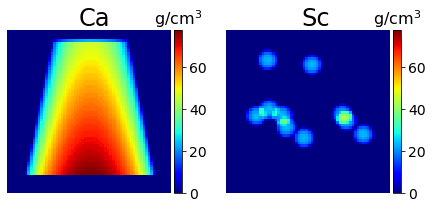

In [23]:
fraction_of_pi = 0.
projection_angle = fraction_of_pi*tc.tensor(np.pi)

gt = np.load(os.path.join(grid_path, f_grid))
gt_rot = rotate(tc.from_numpy(gt).float(), projection_angle, "cpu")
gt_rot = gt_rot.numpy()

smaple_height = gt_rot.shape[1]
image_size = gt_rot.shape[-1]

gt_rot_proj = np.sum(gt_rot, axis=2)
fig6 = plt.figure(figsize=(4 * gt.shape[0] * 0.9 , 3))
gs6 = gridspec.GridSpec(nrows= 1, ncols = gt.shape[0], width_ratios=[1] * gt.shape[0])

fig6.text(0.27, 0.9, 'Ca', color='black', fontsize=24)
fig6.text(0.70, 0.9, 'Sc', color='black', fontsize=24)

for element_idx in range(gt.shape[0]):
    fig6_ax1 = fig6.add_subplot(gs6[0, element_idx])
    fig6_ax1.set_xticks(np.arange(0, image_size, 1))
    fig6_ax1.set_yticks(np.arange(0, image_size, 1))
    # fig6_ax1.grid(color='w', linewidth=2)
    fig6_ax1.axis('off')
    pos = fig6_ax1.imshow(gt_rot_proj[element_idx], cmap='jet', vmin=0, vmax=np.max(gt_rot_proj), extent=[0, image_size, smaple_height, 0], origin='upper')
    divider = make_axes_locatable(fig6_ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
#         ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
#         cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
    cbar = fig6.colorbar(pos, cax=cax)
    cbar.ax.tick_params(labelsize=14) 
    cbar.ax.set_title('g/'+r'$\rm{cm}^{3}$', size='16')

plt.savefig(os.path.join(grid_path, f'gt_projection_{fraction_of_pi}.pdf'))

In [4]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

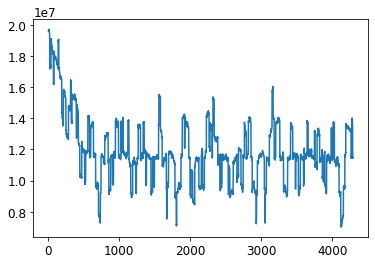

In [14]:
loss = np.load('./data/Xtal1_align1_adjusted1_ds4_recon/Ab_T_nEl_4_nDpts_5_b_1E-4_lr_1E-3/loss_signal.npy')

loss_moving_ave = movingaverage(loss, 110)
plt.plot(loss_moving_ave)

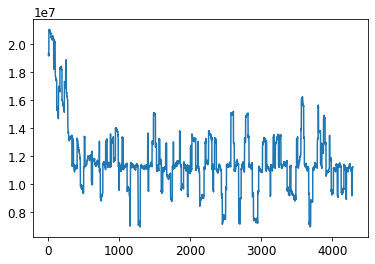

In [11]:
loss = np.load('./data/Xtal1_align1_adjusted1_ds4_recon/Ab_F_nEl_4_nDpts_5_b_1E-4_lr_1E-3/loss_signal.npy')
loss_moving_ave = movingaverage(loss, 110)

plt.plot(loss_moving_ave)


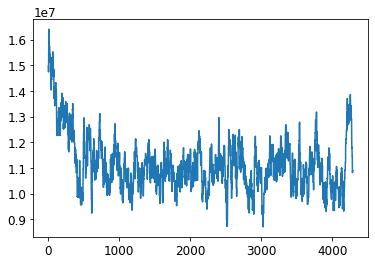

In [15]:
loss = np.load("./data/Xtal1_align1_adjusted1_ds2_recon/Ab_T_nEl_4_nDpts_5_b_1E-4_lr_1E-3/loss_signal.npy")
loss_moving_ave = movingaverage(loss, 110)

plt.plot(loss_moving_ave)

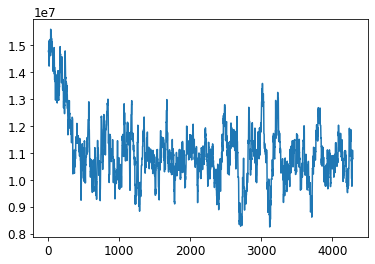

In [17]:
loss = np.load("./data/Xtal1_align1_adjusted1_ds2_recon/Ab_F_nEl_4_nDpts_5_b_1E-4_lr_1E-3/loss_signal.npy")
loss_moving_ave = movingaverage(loss, 110)

plt.plot(loss_moving_ave)

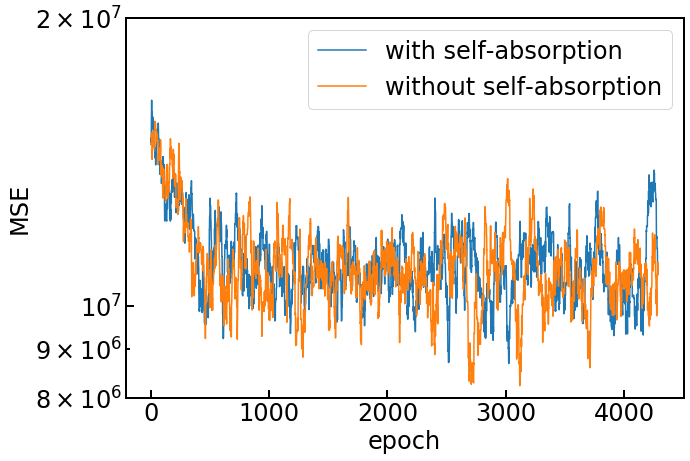

In [27]:
loss_signal_selfAb = np.load("./data/Xtal1_align1_adjusted1_ds2_recon/Ab_T_nEl_4_nDpts_5_b_1E-4_lr_1E-3/loss_signal.npy")
loss_moving_ave_selfAb = movingaverage(loss_signal_selfAb, 110)
loss_signal_woSelfAb = np.load("./data/Xtal1_align1_adjusted1_ds2_recon/Ab_F_nEl_4_nDpts_5_b_1E-4_lr_1E-3/loss_signal.npy")
loss_moving_ave_woselfAb = movingaverage(loss_signal_woSelfAb, 110)
epoch_ls = np.arange(0,4291)

fig0 = plt.figure(figsize = (10,7))
gs0 = gridspec.GridSpec(nrows=1, ncols=1)

fig0_ax0 = fig0.add_subplot(gs0[0,0])
# fig0_ax0.plot(epoch_ls, loss_moving_ave_selfAb, marker='s', fillstyle='none', label="with self-absorption")
# fig0_ax0.plot(epoch_ls, loss_moving_ave_woselfAb, marker='o', fillstyle='none', label="without self-absorption")
fig0_ax0.plot(epoch_ls, loss_moving_ave_selfAb, label="with self-absorption")
fig0_ax0.plot(epoch_ls, loss_moving_ave_woselfAb, label="without self-absorption")
fig0_ax0.set_yscale('log')
fig0_ax0.set_xlabel("epoch", fontsize=24)
fig0_ax0.set_ylabel("MSE", fontsize=24)
fig0_ax0.set_ylim([8.0E6, 2.0E7])
fig0_ax0.tick_params(axis='both', which='major', labelsize=24, width=2, length=8)
fig0_ax0.tick_params(axis='both', which='major', direction='in', width=2, length=8)
fig0_ax0.tick_params(axis='both', which='minor', labelsize=24, width=2, length=4)
fig0_ax0.tick_params(axis='both', which='minor', direction='in', width=2, length=4)
fig0_ax0.spines["top"].set_linewidth(2)
fig0_ax0.spines["bottom"].set_linewidth(2)
fig0_ax0.spines["left"].set_linewidth(2)
fig0_ax0.spines["right"].set_linewidth(2)
fig0_ax0.legend(fontsize=24)
plt.savefig('Self_absorption_effect_convergence.pdf', format='pdf', dpi=600)